# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

> ## Import Modules

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

> ## Scrapping the data

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


> ## Creating Data Frame

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Had to cancel my flight month...
1,✅ Trip Verified | Flight cancelled with no rea...
2,✅ Trip Verified | This is a route I fly regula...
3,✅ Trip Verified | While BA may have made some...
4,✅ Trip Verified | British Airways new Club Sui...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

> ## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
import re

# Define a regex pattern
pattern = re.compile(r'^✅ Trip Verified \| |^Not Verified \| |^✅ Verified Review \| ')

# Function to remove the verified part using regex
def remove_verification_status(text):
    return re.sub(pattern, '', text)

# Apply the function to the entire 'reviews' column
df['reviews'] = df['reviews'].astype(str).apply(remove_verification_status)

# Print the updated dataframe
print(df)

                                                reviews
0     Not Verified |   Had to cancel my flight month...
1     Flight cancelled with no reason given less tha...
2     This is a route I fly regularly. Used first cl...
3      While BA may have made some positive improvem...
4     British Airways new Club Suite is a marked imp...
...                                                 ...
1995  Glasgow to London Gatwick with British Airways...
1996  British Airways is a very good airline. Yester...
1997   London to Cape Town. Galleries lounge at T3 t...
1998  In September 2016, I flew with British Airways...
1999   St Petersburgh to London. I don’t know where ...

[2000 rows x 1 columns]


> ## Data Preprocessing

1. Converting to lowercase

In [9]:
def to_lower(text):
    return text.lower()

df["reviews"] = df["reviews"].apply(to_lower)
df

,reviews
0,not verified | had to cancel my flight month...
1,flight cancelled with no reason given less tha...
2,this is a route i fly regularly. used first cl...
3,while ba may have made some positive improvem...
4,british airways new club suite is a marked imp...
...,...
1995,glasgow to london gatwick with british airways...
1996,british airways is a very good airline. yester...
1997,london to cape town. galleries lounge at t3 t...
1998,"in september 2016, i flew with british airways..."


2. Removing Contractions

In [10]:
# Define contractions dictionary
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
# Create a function to remove contractions

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [12]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(lambda x: expand_contractions(x, contractions_dict))
df.head(2)

,reviews
0,not verified | had to cancel my flight month...
1,flight cancelled with no reason given less tha...
2,this is a route i fly regularly. used first cl...
3,while ba may have made some positive improvem...
4,british airways new club suite is a marked imp...
...,...
1995,glasgow to london gatwick with british airways...
1996,british airways is a very good airline. yester...
1997,london to cape town. galleries lounge at t3 t...
1998,"in september 2016, i flew with british airways..."


3. Removing Numbers

In [13]:
# Create a function to remove numbers
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [14]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(remove_numbers)
df.head(2)

,reviews
0,not verified | had to cancel my flight month...
1,flight cancelled with no reason given less tha...


4. Remove Punctuations

In [15]:
# Define a function to remove punctuations
from string import punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [16]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(remove_punct)

5. Remove Whitespace

In [17]:
# Define a function to remove whitespace
def to_strip(text):
    return " ".join(text.split())

In [18]:
# Applying to the DF
df["reviews"] = df["reviews"].apply(to_strip)

6. Removing Stopwords

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
# Define a functions to remove stopwords
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [22]:
# Applying to the DF
df["reviews"] = df["reviews"].apply(remove_stopwords)
df.head(2)

,reviews
0,verified cancel flight months advance due chan...
1,flight cancelled reason given less h departure...


7. Lemmatizations

In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gembo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Define a function for lemmatizations
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [25]:
# Applying to DF
df["reviews"] = df["reviews"].apply(lemmatize)

In [26]:
pd.options.display.max_colwidth = None
df.head(3)

,reviews
0,verified cancel flight month advance due change schedule flying american airline british airway selected seat attempted get refund selected seat aa refunded issue ba refused despite company similar policy avoid fly anyone else customer service joke taking week respond email giving justification told phone
1,flight cancelled reason given le h departure earliest offered replacement terrible use app day later unacceptable phone line work would reject call due overwhelmed even submitting claim website frustrating due terrible interface overall terrible company wholly inadequate customer service
2,route fly regularly used first class security lounge good lounge surprisingly busy great see departing dreaded bus gate flight time boarded ready go time six passenger show minute delay offload bag depart longer actual flight better process fast tracking hence finally arrived paris min late plus side cabin crew great even personal welcome inflight manager happens le le day


8. Adding Stemming

In [27]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [28]:
# # Applying to DF
# df["reviews"] = df["reviews"].apply(stem)

In [29]:
# pd.options.display.max_colwidth = None
# df.head(3)

> ## Word Exploration

1. Word frequent

In [30]:
# Creating a function to check frequent word
def freq_check(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    temp = {'word':check.index,'freq':check.values}
    temp = pd.DataFrame(temp)
    temp.index = temp['word']
    temp.drop('word', axis = 1, inplace = True)
    temp.sort_values('freq',ascending=False,inplace=True)
    
    return temp

In [31]:
# Top 20 frequent word
freq_word = freq_check(df["reviews"])
freq_word.head(20)

,freq
word,
flight,4462
ba,2809
seat,2084
service,1682
london,1388
time,1289
food,1152
crew,1127
airline,1102


<Axes: ylabel='word'>

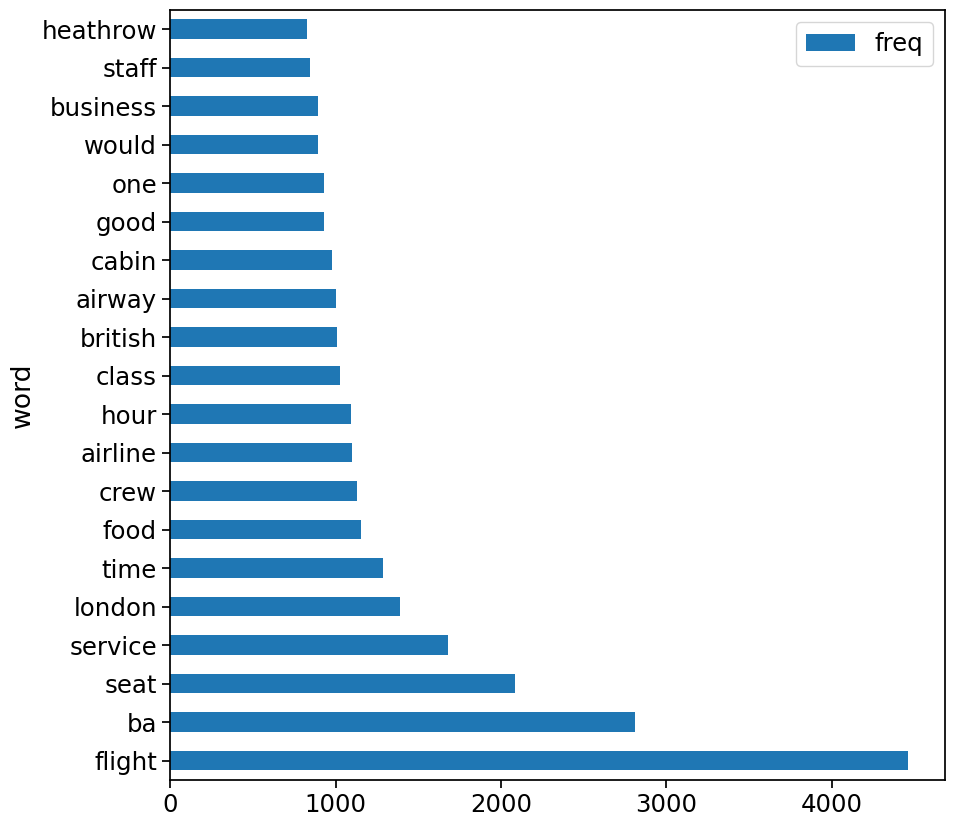

In [32]:
import seaborn as sns
sns.set_context(context = 'notebook', font_scale = 1.6)
freq_word[:20].plot(kind = 'barh',figsize = (10,10))

2. Polarity 

In [33]:
# Defining polarity function
from textblob import TextBlob
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_calc(num):
    if num < 0:
        return "Negative"
    elif num > 0:
        return "Positive"
    else:
        return "Neutral"

In [34]:
# Creating tags
df["polarity"] = df["reviews"].apply(polarity_calc)
df["tag"] = df["polarity"].apply(tag_calc)
df.head(5)

,reviews,polarity,tag
0,verified cancel flight month advance due change schedule flying american airline british airway selected seat attempted get refund selected seat aa refunded issue ba refused despite company similar policy avoid fly anyone else customer service joke taking week respond email giving justification told phone,0.135000,Positive
1,flight cancelled reason given le h departure earliest offered replacement terrible use app day later unacceptable phone line work would reject call due overwhelmed even submitting claim website frustrating due terrible interface overall terrible company wholly inadequate customer service,-0.456250,Negative
2,route fly regularly used first class security lounge good lounge surprisingly busy great see departing dreaded bus gate flight time boarded ready go time six passenger show minute delay offload bag depart longer actual flight better process fast tracking hence finally arrived paris min late plus side cabin crew great even personal welcome inflight manager happens le le day,0.323333,Positive
3,ba may made positive improvement club world product world traveler product catering leaf much desired first meal service slow hour serve meal portion incredibly small chicken dish contained maybe piece chicken piece broccoli piece unknown food small snack available flight real let snack landing vancouver bizarre tasting chicken pastry wrap much chicken taste like pastry sweet mushy salty seat although exactly spacious tolerable although aisle narrow cabin crew passenger frequently bumped walking aisle cabin crew generally responsive passenger request twice flight came aisle drink however poor level catering made frustrating trip certainly recommend ba,-0.075384,Negative
4,british airway new club suite marked improvement older club world seat new club suite offer fair amount privacy especially screen door closed includes direct aisle access fully reclined seat convert fairly spacious bed although found surface side bit hard uncomfortable sleep catering board fairly good tasty appetizer main course generally well cooked although cabin crew slow meal service took almost hour departure vancouver meal service completed prior arrival light breakfast served contained croissant small egg bacon sandwich mango puree ba catering flight generally good unfortunately upon arrival heathrow passenger wait minute checked baggage arrive explanation given single member ground staff came assist passenger provide information checked baggage would arrive frustrating end otherwise fairly enjoyable trip club world left poor last impression ba,0.064554,Positive


In [35]:
df["tag"].value_counts(normalize=True).reset_index()

,tag,proportion
0,Positive,0.6535
1,Negative,0.3355
2,Neutral,0.0110


In [36]:
# Top 20 frequent word for positive sentiment
freq_word_postive = freq_check(df["reviews"].where(df["tag"] == "Positive"))
freq_word_postive.head(20)

,freq
word,
flight,3040
ba,1934
seat,1418
service,1150
time,934
london,922
crew,897
good,858
food,835


In [37]:
# Top 20 frequent word for negative sentiment
freq_word_negative = freq_check(df["reviews"].where(df["tag"] == "Negative"))
freq_word_negative.head(20)

,freq
word,
flight,1391
ba,850
seat,652
service,520
london,453
hour,438
airline,400
british,352
time,351


In [38]:
# Top 20 frequent word for neutral sentiment
freq_word_neutral = freq_check(df["reviews"].where(df["tag"] == "Neutral"))
freq_word_neutral.head(20)

,freq
word,
flight,31
ba,25
seat,14
london,13
service,12
british,10
airway,10
day,9
luggage,9


3. Visualization

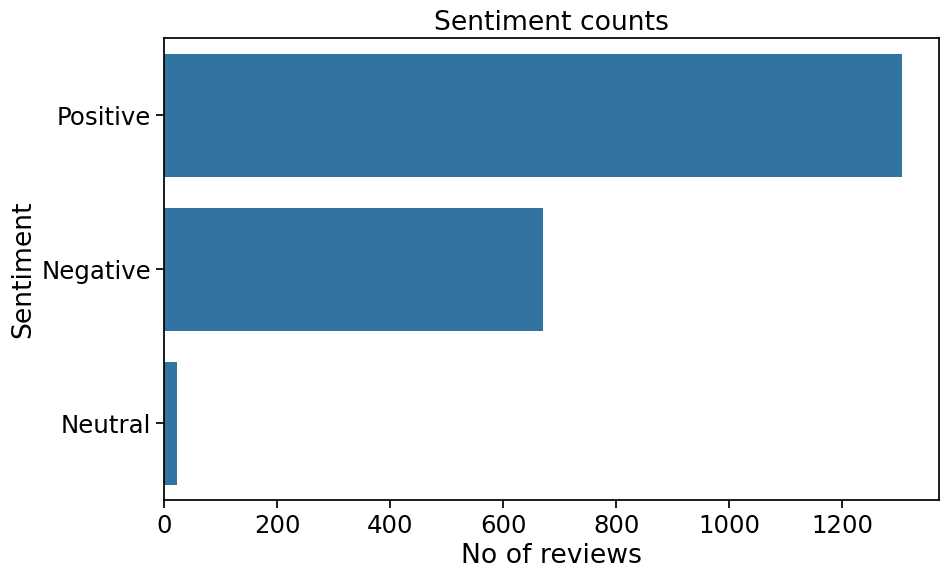

In [39]:
# Visualizing with bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=df['tag'].value_counts().values, y=df['tag'].value_counts().index, orient='h')
plt.ylabel("Sentiment")
plt.xlabel("No of reviews")
plt.title("Sentiment counts")
plt.show()

In [40]:
from wordcloud import WordCloud

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

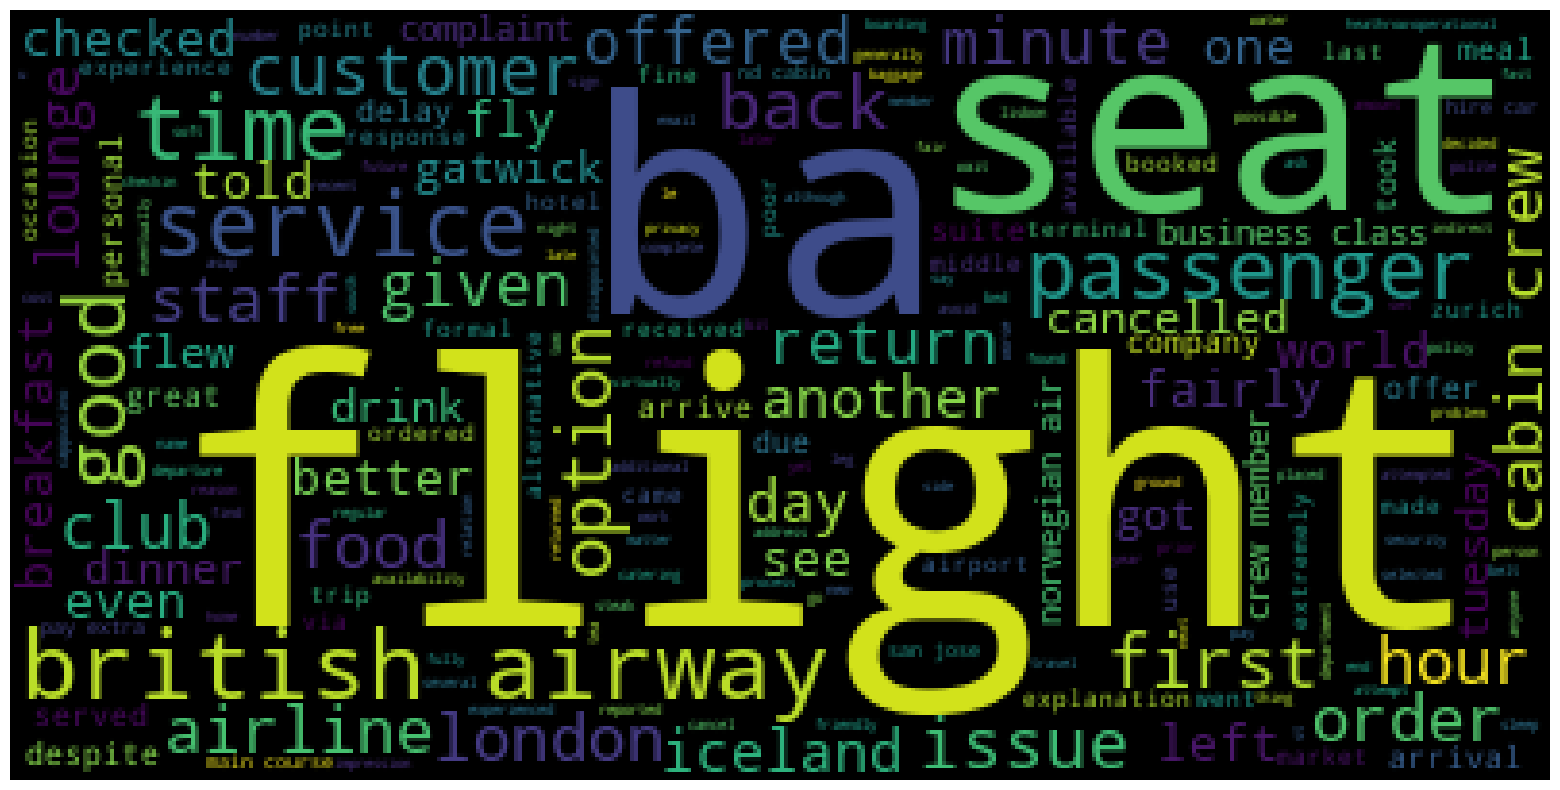

In [41]:
# World cloud positive sentiment
word_cloud_positive = WordCloud().generate(str(df[df['tag'] == 'Positive']['reviews']))
plot_cloud(word_cloud_positive)

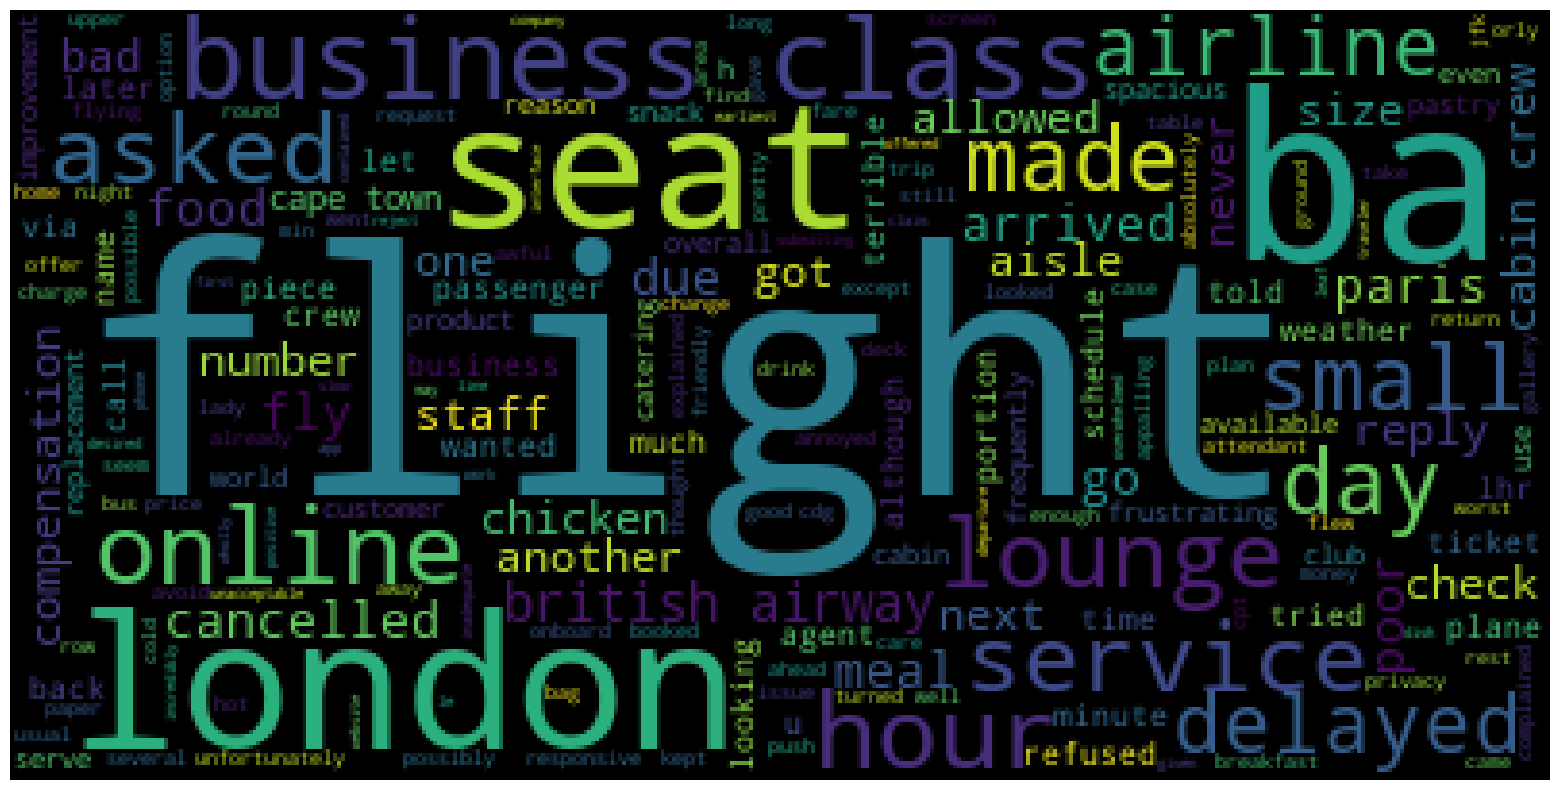

In [42]:
# World cloud negative sentiment
word_cloud_negative = WordCloud().generate(str(df[df['tag'] == 'Negative']['reviews']))
plot_cloud(word_cloud_negative)

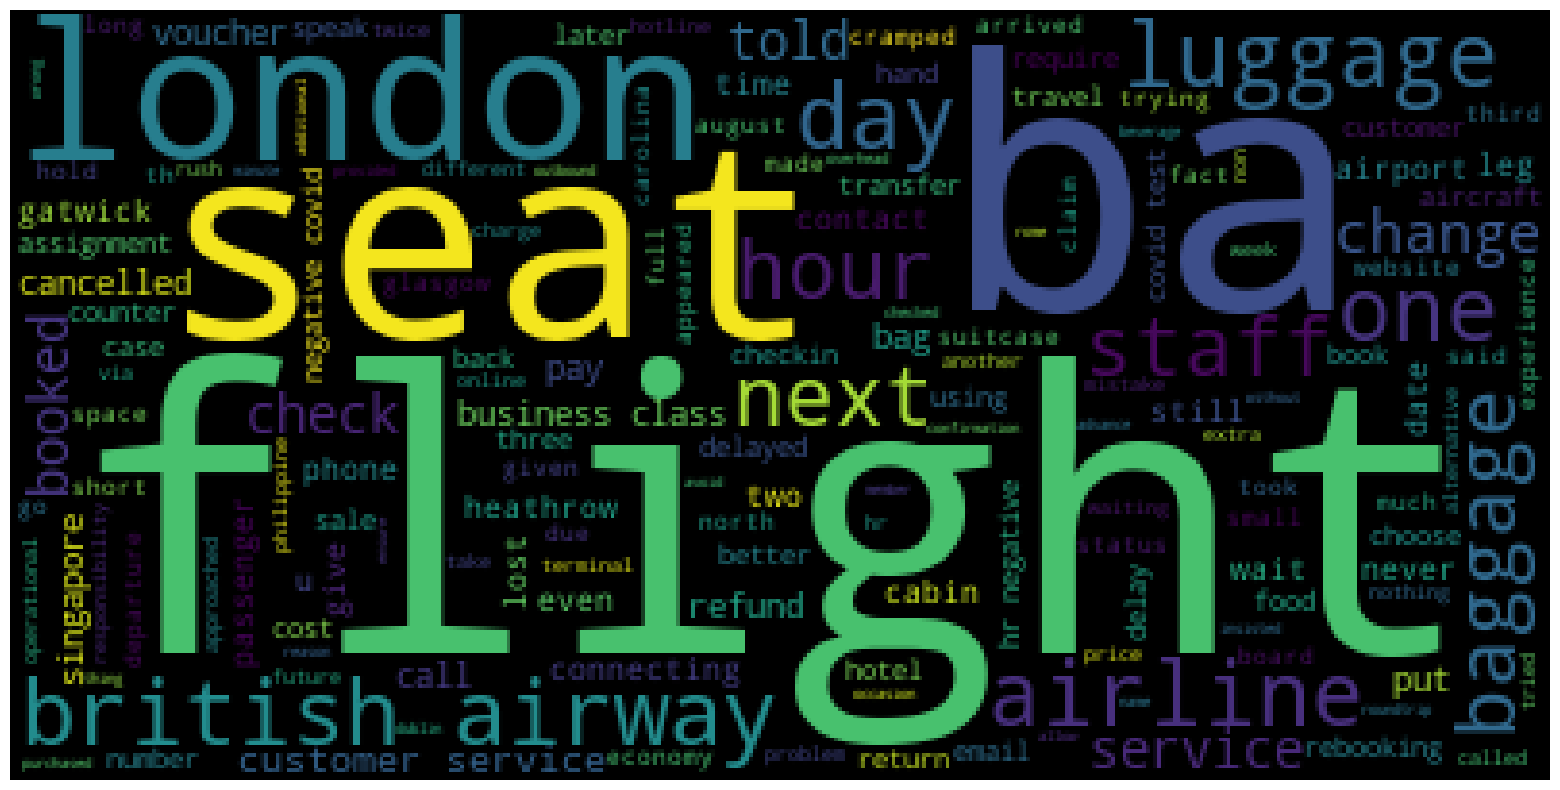

In [43]:
# World cloud neutral sentiment
word_cloud_neutral = WordCloud().generate(str(df[df['tag'] == 'Neutral']['reviews']))
plot_cloud(word_cloud_neutral)

> Prediction Model with SVM

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report

In [45]:
df.head(1)

,reviews,polarity,tag
0,verified cancel flight month advance due change schedule flying american airline british airway selected seat attempted get refund selected seat aa refunded issue ba refused despite company similar policy avoid fly anyone else customer service joke taking week respond email giving justification told phone,0.135,Positive


In [46]:
text = df["reviews"]
y = np.where(df["tag"] == "Negative", 1, 0)

In [47]:
# data split
text_train, text_test, y_train, y_test = train_test_split(
    text,
    y,
    test_size=0.2,
    random_state=0
)

In [48]:
# transform the data and training
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [49]:
print('X_train size:\n', repr(X_train))
print('X_test size:\n', repr(X_test))

X_train size:
 <1600x8729 sparse matrix of type '<class 'numpy.int64'>'
	with 106015 stored elements in Compressed Sparse Row format>
X_test size:
 <400x8729 sparse matrix of type '<class 'numpy.int64'>'
	with 26705 stored elements in Compressed Sparse Row format>


In [50]:
feature_names = vect.get_feature_names_out()
print('number of features:', len(feature_names))
print('first 10 features:\n', feature_names[:10])
print('last 10 features:\n', feature_names[-10:])

number of features: 8729
first 10 features:
 ['aa' 'ab' 'aback' 'abandon' 'abandondoned' 'abandoned' 'abandoning'
 'abba' 'abbreviate' 'abdication']
last 10 features:
 ['zone' 'zoo' 'zrh' 'zrhlhr' 'zuletzt' 'zum' 'zurich' 'zusammenschluss'
 'zürich' 'über']


In [51]:
# Modeling with SVM without tuning
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       247
           1       0.93      0.42      0.58       153

    accuracy                           0.77       400
   macro avg       0.83      0.70      0.71       400
weighted avg       0.81      0.77      0.74       400



In [73]:
# SVM with tuning
tf_idf_prep = TfidfTransformer()
model = SVC()
pipe = Pipeline([("vect", CountVectorizer(stop_words="english")),("preprocess", tf_idf_prep), ("model", model)])

param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'poly', 'linear']
}

svm_tuning = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    refit=True,
    verbose=3,
    scoring="accuracy"
)

In [74]:
svm_tuning.fit(text_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=0.678 total time=   1.7s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=0.678 total time=   1.6s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=0.675 total time=   1.7s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=0.675 total time=   2.2s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=0.675 total time=   1.6s
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=0.678 total time=   1.6s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=0.678 total time=   1.6s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=0.675 total time=   1.6s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=0.675 total time=   1.6s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=0.675 total time= 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('preprocess', TfidfTransformer()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy', verbose=3)

In [75]:
print('best params', svm_tuning.best_params_)
print('best score', svm_tuning.best_score_)

best params {'model__C': 100, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
best score 0.799375


In [76]:
svm_tuning.best_estimator_.fit(text_train, y_train)
y_pred_tuned = svm_tuning.best_estimator_.predict(text_test)
svm_best = svm_tuning.best_estimator_

In [77]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       247
           1       0.80      0.66      0.72       153

    accuracy                           0.81       400
   macro avg       0.81      0.78      0.79       400
weighted avg       0.81      0.81      0.80       400



In [78]:
import pickle
# Save the Best Model and Vectorizer
with open('svm_best.pkl', 'wb') as f:
    pickle.dump((svm_best, svm_best['vect']), f)  # Save both model and vectorizer

> Prediction using the best model, SVM

In [81]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Preprocessing function (same as the one used in training)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\'s", "", text)  # Remove contractions
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

while True:
    new_text = input("Please enter a review (or type 'quit' to exit): ")
    if new_text.lower() == 'quit':
        break
    
    # Preprocess the new text
    preprocessed_text = preprocess_text(new_text)

    # Predict using the best SVM model
    prediction = svm_best.predict([preprocessed_text])[0]
    if prediction > 0.6:  # Higher threshold for negative
        sentiment = "Negative"
    elif prediction < 0.4: # Lower threshold for positive
        sentiment = "Positive"
    else:
        sentiment = "Neutral"

    print(f"Predicted Sentiment: {sentiment}, Confidence: {svm_best.decision_function([preprocessed_text])[0]:.4f}")


Predicted Sentiment: Positive, Confidence: -1.1656
Predicted Sentiment: Negative, Confidence: 1.0022
Predicted Sentiment: Positive, Confidence: -0.4205
Predicted Sentiment: Positive, Confidence: -0.8297
